# Example 6.3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from matplotlib.patches import Ellipse
from scipy import stats

- $X_{1} =$ lather
- $X_{2} =$ mildness

In [2]:
xbar1 = np.array([8.3, 4.1])[:, np.newaxis]
xbar2 = np.array([10.2, 3.9])[:, np.newaxis]

In [3]:
S1 = np.array([[2,1],[1,6]])
S2 = np.array([[2,1],[1,4]])

In [4]:
n1 = n2 = 50
p = 2
alpha = 0.05

$$
\textbf{S}_{\text{pooled}}
=
\frac{n_{1} - 1}{n_{1} + n_{2} - 2} \textbf{S}_{1}
+
\frac{n_{2} - 1}{n_{1} + n_{2} - 2} \textbf{S}_{2}
$$

In [5]:
S_pooled = ((n1-1)/(n1 + n2 - 2))*S1 + ((n2-1)/(n1 + n2 - 2))*S2
S_pooled

array([[2., 1.],
       [1., 5.]])

In [6]:
xbard = xbar1 - xbar2
xbard

array([[-1.9],
       [ 0.2]])

In [7]:
l, e = la.eigh(S_pooled)

$$
    c^{2}
    =
    \frac{(n_{1} + n_{2} - 2)p}{n_{1} + n_{2} - (p + 1)}
    F_{p, n_{1} + n_{2} - (p + 1)}
    (\alpha)
$$

In [8]:
const = (((n1 + n2 - 2)*p)/(n1 + n2 - (p + 1)))
f_value = stats.f.ppf(1-alpha, dfn=p, dfd=n1+n2-(p+1))
c2 = const*f_value
c2

6.244088539488174

In [9]:
np.sqrt(l)*np.sqrt(((1/n1) + (1/n2))*c2)

array([0.65107969, 1.15084318])

In [10]:
max_idx, min_idx = np.argmax(l), np.argmin(l)
lmbda1, lmbda2 = l[max_idx], l[min_idx]
e1, e2 = e[:, max_idx].copy(), e[:, min_idx].copy()
ell_width = np.sqrt(lmbda1)*np.sqrt((1/n1) + (1/n2))*np.sqrt(const*f_value)
ell_height = np.sqrt(lmbda2)*np.sqrt((1/n1) + (1/n2))*np.sqrt(const*f_value)
ell_angle = np.degrees(np.arctan2(e1[1], e1[0]))

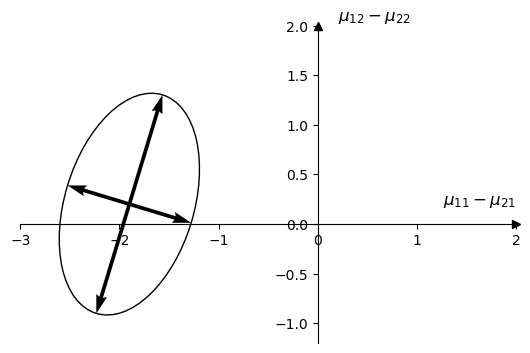

In [11]:
plt.figure()
ax = plt.gca()
ellipse = Ellipse(xy=xbard,
                width=2*ell_width,
                height=2*ell_height,
                angle=ell_angle,
                fill=False)
ax.add_patch(ellipse)
for i in [-1, 1]:
    plt.quiver(xbard[0],
            xbard[1],
            e1[0] * ell_width * i,
            e1[1] * ell_width * i,
            angles='xy',
            scale_units='xy',
            scale=1
            )
    plt.quiver(xbard[0],
            xbard[1],
            e2[0]* ell_height * i,
            e2[1]* ell_height * i,
            angles='xy',
            scale_units='xy',
            scale=1)
ax.set_aspect('equal')

# Set the spines to cross at (0, 0).
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines.
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Add arrows at the ends of the axes.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Add labels for the axes.
ax.text(2, 0.2, r'$\mu_{11} - \mu_{21}$', fontsize=12, ha='right')
ax.text(0.2, 2, r'$\mu_{12} - \mu_{22}$', fontsize=12, va='bottom')

plt.xlim(-3,2)
plt.ylim(-1.2, 2.0)
plt.show()